<a href="https://colab.research.google.com/github/ReDxDaGer/Face-Expression-Recognition/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests

In [38]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git
%cd yolov5/
!pip install -r requirements.txt

/content/yolov5


In [45]:
from google.colab import userdata
key = userdata.get('key')

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=key)
project = rf.workspace("human-face-expression-recognition").project("human-face-expression")
version = project.version(20)
dataset = version.download("yolov5")



loading Roboflow workspace...
loading Roboflow project...


In [40]:
pwd

'/content/yolov5'

In [41]:
!cat /content/yolov5/Human-Face-Expression-20/data.yaml

names:
- angry
- disgust
- fear
- happy
- neutral
- sad
- surprise
nc: 7
roboflow:
  license: CC BY 4.0
  project: human-face-expression
  url: https://universe.roboflow.com/human-face-expression-recognition/human-face-expression/dataset/20
  version: 20
  workspace: human-face-expression-recognition
test: ../test/images
train: Human-Face-Expression-20/train/images
val: Human-Face-Expression-20/valid/images


In [42]:
TRAIN = True
EPOCHS = 24

In [13]:
def set_res_dir():
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR


In [43]:
cd yolov5/

[Errno 2] No such file or directory: 'yolov5/'
/content/yolov5


In [18]:
RES_DIR = set_res_dir()
!python train.py --data /content/yolov5/Human-Face-Expression-20/data.yaml --weights yolov5s.pt \
    --img 640 --epochs {EPOCHS} --batch-size 16 --name {RES_DIR}

Current number of result directories: 2
results_3
2024-07-03 19:27:36.904829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 19:27:36.904874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 19:27:36.906092: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Human-Face-Expression-20/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=24, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bu

In [19]:
cd ..

/content


In [21]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom' , path = 'yolov5/runs/train/results_3/weights/best.pt', force_reload=True)

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-7-3 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [33]:
img = os.path.join('hello.jpg')

In [34]:
results = model(img)

In [35]:
results.print()

image 1/1: 3264x1836 2 happys
Speed: 58.6ms pre-process, 53.5ms inference, 2.8ms NMS per image at shape (1, 3, 640, 384)


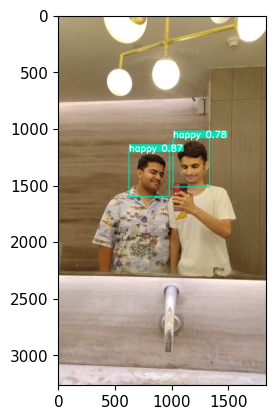

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
